# Group Assignment AY 2025-2026
## Getting you started (Part 1)

Welcome to the first notebook in this three-part series designed to help you get started on your group assignment. In this series, we'll guide you through various stages of data exploration, cleaning, and analysis to help you gain insights into the dataset and meet the requirements of your assignment.

### What to Expect in this Notebook
In this first notebook, we will:

- Understand the dataset – Examine the columns and data types, and get familiar with the dataset's structure.
- Basic data cleaning – Handle missing values, remove duplicates, and prepare the dataset for analysis.
- Initial exploration – Perform basic descriptive statistics and visualizations to uncover key patterns in the data.

By the end of this notebook, you and your group will have a solid foundation to get started on the group assignment and prepare for more advanced analysis in the following notebooks.

In [43]:
# Import packages
from datetime import datetime
import pandas as pd
import numpy as np
import os

In [44]:
# Define directory to look at
data_dir = "./Data/"

# Let's have a look
os.listdir(data_dir)

['satisfaction.csv',
 '.DS_Store',
 'stops.csv',
 'train_3605.png',
 'tickets.csv',
 'stations.csv',
 'subscriptions.csv',
 'facilities.csv',
 'travelers.csv',
 'Trips',
 'Overview_NMBS_data.png',
 'incidents.csv']

In [45]:
# NOTE: 'Trips' is not a file, but a folder!
# NOTE: if you are working on a mac, you may have a .DS_Store file in your directory
# this is a hidden file that is created by macOS

# We can select a certain file type (here: .csv) by running the following command:
dir_list = [obs for obs in os.listdir(data_dir) if ".csv" in obs]
dir_list

['satisfaction.csv',
 'stops.csv',
 'tickets.csv',
 'stations.csv',
 'subscriptions.csv',
 'facilities.csv',
 'travelers.csv',
 'incidents.csv']

In [46]:
# Since 'Trips' is not a file, but a folder we access its contents by doing the following:
folder_dir = './Data/Trips/'
folder_list = [obs for obs in os.listdir(folder_dir) if ".DS" not in obs]
folder_list

['Trips_27_09_2025.csv',
 'Trips_22_09_2025.csv',
 'Trips_28_09_2025.csv',
 'Trips_24_09_2025.csv',
 'Trips_23_09_2025.csv',
 'Trips_26_09_2025.csv',
 'Trips_25_09_2025.csv']

## Overview

<img src="./Data/Overview_NMBS_data.png" align="center" width="800"/>

\* Only travelers with a subscription were asked to participate in the satisfaction survey. You can also look at external data sources w.r.t. satisfaction of the stations themselves.

\** It is possible that a station is mentioned but that the train didn’t stop there, it just went through the station (e.g., IC lines)

## 1. Tickets & Subscriptions
These are two of the main files for the group assignment. As you can see in the ERD above, they are at the heart of the overview.

In [47]:
# Import tickets and subscriptions datasets
tickets_df = pd.read_csv("./Data/tickets.csv")
subscriptions_df = pd.read_csv("./Data/subscriptions.csv")

In [48]:
# Show first 5 rows
tickets_df.head()

,datetime_of_purchase,start_station,end_station,ticket_type,class,price,customer_id
0,2025-09-22 05:00:00,delta,brussel-noord/bruxelles-nord,Standard Ticket,1st,4.53,NaN
1,2025-09-22 05:00:00,leuven,antwerpen-centraal,Standard Ticket,2nd,6.50,NaN
2,2025-09-22 05:00:00,brussel-centraal/bruxelles-central,zellik,Standard Multi,1st,16.10,NaN
3,2025-09-22 05:01:00,brussels airport - zaventem,oostende,Standard Multi,2nd,10.50,NaN
4,2025-09-22 05:01:00,marloie,gent-sint-pieters,Standard Ticket,2nd,16.24,NaN


In [49]:
# Show first 5 rows
subscriptions_df.head()

,customer_id,start_station,end_station,class,start_date,end_date,price
0,d232cb95-23cd-45f0-84e7-a53069917f1a,liège-guillemins,gent-sint-pieters,2nd,2025-08-01,2026-08-01,628.96
1,8d57a105-c25c-4d51-b438-db2f15add8b0,ottignies,silly,2nd,2025-08-14,2026-08-14,357.50
2,a5540a29-15aa-49d9-8eb2-8f182855bcd5,ninove,charleroi-sud,2nd,2024-12-31,2025-12-31,417.28
3,033af55a-84f7-4d11-adcd-301bf6df974b,nessonvaux,antwerpen-centraal,2nd,2025-01-12,2026-01-12,604.18
4,6b31bdba-22e3-4e45-bdae-cfb9831b9fef,ottignies,asse,2nd,2025-04-24,2026-04-24,315.50


In [50]:
# Check data type of columns
tickets_df.dtypes

datetime_of_purchase     object
start_station            object
end_station              object
ticket_type              object
class                    object
price                   float64
customer_id              object
dtype: object

In [51]:
# Check data type of columns
subscriptions_df.dtypes

customer_id       object
start_station     object
end_station       object
class             object
start_date        object
end_date          object
price            float64
dtype: object

### Date format
As you can see the date variables in both dataframes (`datetime_of_purchase`, `start_date`, `end_date`) are still in the string format, so we will have to convert them into the correct **date format** to perform operations on it.

In [52]:
# Show first 5 rows for tickets_df
tickets_df[['datetime_of_purchase']].head()

,datetime_of_purchase
0,2025-09-22 05:00:00
1,2025-09-22 05:00:00
2,2025-09-22 05:00:00
3,2025-09-22 05:01:00
4,2025-09-22 05:01:00


In [53]:
# Show first 5 rows for subscriptions_df
subscriptions_df[['start_date', 'end_date']].head()

,start_date,end_date
0,2025-08-01,2026-08-01
1,2025-08-14,2026-08-14
2,2024-12-31,2025-12-31
3,2025-01-12,2026-01-12
4,2025-04-24,2026-04-24


Notice that the date variable in tickets_df is in the `YYYY-MM-DD HH:MM:SS` format, while the date variables in subscriptions_df (`start_date`, `end_date`) are in another format (`YYYY-MM-DD`). To get an **overview** of the `strftime()` and `strptime()` **Format Codes** used in `format` parameter go to https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [54]:
# Convert the string format to datetime object
tickets_df['datetime_of_purchase'] = pd.to_datetime(tickets_df['datetime_of_purchase'], format='%Y-%m-%d %H:%M:%S')

subscriptions_df['start_date'] = pd.to_datetime(subscriptions_df['start_date'], format='%Y-%m-%d')
subscriptions_df['end_date'] = pd.to_datetime(subscriptions_df['end_date'], format='%Y-%m-%d')

In [55]:
# Let's check the min and max date in the datasets
print('First date in tickets_df:', tickets_df['datetime_of_purchase'].min())
print('Last date in tickets_df:', tickets_df['datetime_of_purchase'].max())
print('---')
print('First subscription start_date:', subscriptions_df['start_date'].min())
print('Last subscription start_date:', subscriptions_df['start_date'].max())
print('---')
print('First subscription end_date:', subscriptions_df['end_date'].min())
print('Last subscription end_date:', subscriptions_df['end_date'].max())

First date in tickets_df: 2025-09-22 05:00:00
Last date in tickets_df: 2025-09-28 23:59:00
---
First subscription start_date: 2024-12-03 00:00:00
Last subscription start_date: 2025-09-29 00:00:00
---
First subscription end_date: 2025-12-03 00:00:00
Last subscription end_date: 2026-09-29 00:00:00


In [56]:
# Check how many subscriptions where placed in each month 
monthly_counts = subscriptions_df.groupby(subscriptions_df['start_date'].dt.to_period('M')).size()
monthly_counts

start_date
2024-12    1798
2025-01    1918
2025-02    1779
2025-03    1891
2025-04    1858
2025-05    1944
2025-06    1828
2025-07    1902
2025-08    1926
2025-09    1720
Freq: M, dtype: int64

In [57]:
# Check updated data types
tickets_df.dtypes

datetime_of_purchase    datetime64[ns]
start_station                   object
end_station                     object
ticket_type                     object
class                           object
price                          float64
customer_id                     object
dtype: object

In [58]:
# Check updated data types
subscriptions_df.dtypes

customer_id              object
start_station            object
end_station              object
class                    object
start_date       datetime64[ns]
end_date         datetime64[ns]
price                   float64
dtype: object

### Missing values
Let's now investigate whether we have to deal with **missing values**:

In [59]:
# Check number of missing values per variable in tickets_df
for col in tickets_df.columns:
    missings = len(tickets_df[col][tickets_df[col].isnull()])
    print(col, missings)

datetime_of_purchase 0
start_station 0
end_station 0
ticket_type 0
class 0
price 111298
customer_id 138547


In [60]:
# Check number of missing values per variable in tickets_df
for col in tickets_df.columns:
    missings = len(tickets_df[col][tickets_df[col].isnull()]) / float(len(tickets_df))
    print(col, missings)

datetime_of_purchase 0.0
start_station 0.0
end_station 0.0
ticket_type 0.0
class 0.0
price 0.44546819027797235
customer_id 0.5545318097220276


As you can see we have quite some missing values in the `price`and `customer_id` column. Let's investigate ny filtering for these cases: 

In [61]:
# Filter for customer_id values and check unique values for ticket_type
print("Filtered: ", tickets_df[tickets_df['customer_id'].isnull()]['ticket_type'].unique())

# Check original set of options for ticket_type
print("Original: ", tickets_df['ticket_type'].unique())

Filtered:  ['Standard Ticket' 'Standard Multi' 'Senior Ticket' 'Weekend Ticket']
Original:  ['Standard Ticket' 'Standard Multi' 'Subscription' 'Senior Ticket'
 'Weekend Ticket']


We notice that all the rows for which the `customer_id` is present seem to be **subscriptions** exclusively! 

This makes sense because these are the same `customer_id`s that can be found in the subscriptions dataframe. Therefore, these are the only customers we can have more detailed information about such as (age, contact information, gender, etc.). However, due to strict **GDPR regulations** this information is not shared withing the provided datasets. The other rows in the tickets dataframe can be seen as standalone purchases of tickets (**NOTE**: you also have *Standard Multi* tickets which is a ticket that can be used for a fixed amount (10) of trajectories).

In [62]:
# Let's also check the missing values for price
print("Filtered: ", tickets_df[tickets_df['price'].isnull()]['ticket_type'].unique())

# Check original set of options for ticket_type
print("Original: ", tickets_df['ticket_type'].unique())

Filtered:  ['Subscription']
Original:  ['Standard Ticket' 'Standard Multi' 'Subscription' 'Senior Ticket'
 'Weekend Ticket']


We also notice that in case that a *subscription* was used by the customer, that the `price` of the tickets is **not mentioned** (hence: missing value). The reason for this is that the subscription is paid for upfront at the `start_date`. Both the start date of the subscription as well as the price can be found in the subscription dataframe.

Let's check whether we have to deal with missing values in the **subscription dataframe**:

In [63]:
# Check number of missing values per variable in subscriptions_df
for col in subscriptions_df.columns:
    missings = len(subscriptions_df[col][subscriptions_df[col].isnull()])
    print(col, missings)

customer_id 0
start_station 0
end_station 0
class 0
start_date 0
end_date 0
price 0


In [64]:
# Check number of missing values per variable in subscriptions_df
for col in subscriptions_df.columns:
    missings = len(subscriptions_df[col][subscriptions_df[col].isnull()]) / float(len(subscriptions_df))
    print(col, missings)

customer_id 0.0
start_station 0.0
end_station 0.0
class 0.0
start_date 0.0
end_date 0.0
price 0.0


Nice, it seems like we have don't miss any values in the subscriptions dataset!

### Linking the two datasets
Let's go into more detail about these subscriptions by having a look at them **in both datasets**:

In [65]:
# Show tickets_df
tickets_df.head()

,datetime_of_purchase,start_station,end_station,ticket_type,class,price,customer_id
0,2025-09-22 05:00:00,delta,brussel-noord/bruxelles-nord,Standard Ticket,1st,4.53,NaN
1,2025-09-22 05:00:00,leuven,antwerpen-centraal,Standard Ticket,2nd,6.50,NaN
2,2025-09-22 05:00:00,brussel-centraal/bruxelles-central,zellik,Standard Multi,1st,16.10,NaN
3,2025-09-22 05:01:00,brussels airport - zaventem,oostende,Standard Multi,2nd,10.50,NaN
4,2025-09-22 05:01:00,marloie,gent-sint-pieters,Standard Ticket,2nd,16.24,NaN


In [66]:
# Show subscriptions_df
subscriptions_df.head()

,customer_id,start_station,end_station,class,start_date,end_date,price
0,d232cb95-23cd-45f0-84e7-a53069917f1a,liège-guillemins,gent-sint-pieters,2nd,2025-08-01,2026-08-01,628.96
1,8d57a105-c25c-4d51-b438-db2f15add8b0,ottignies,silly,2nd,2025-08-14,2026-08-14,357.50
2,a5540a29-15aa-49d9-8eb2-8f182855bcd5,ninove,charleroi-sud,2nd,2024-12-31,2025-12-31,417.28
3,033af55a-84f7-4d11-adcd-301bf6df974b,nessonvaux,antwerpen-centraal,2nd,2025-01-12,2026-01-12,604.18
4,6b31bdba-22e3-4e45-bdae-cfb9831b9fef,ottignies,asse,2nd,2025-04-24,2026-04-24,315.50


In [67]:
# Check if all customer_ids are unique in subscriptions_df
subscriptions_df['customer_id'].is_unique

True

In [68]:
# Check if number of unique customer_ids in tickets_df is equal to the number of rows (i.e. unique values) in subscriptions_df
len(tickets_df['customer_id'].unique()) == len(subscriptions_df['customer_id'].unique())

# Since we get False, let's have a look at the difference
print("Unique customer IDs in tickets:", len(tickets_df['customer_id'].unique()))
print("Unique customer IDs in subscriptions:", len(subscriptions_df['customer_id'].unique()))

Unique customer IDs in tickets: 18565
Unique customer IDs in subscriptions: 18564


The difference seems to be for just a single value. However, this does not necessarily have to entail an actual Customer ID. Remember from last week that **None variables** are also values! Since we didn't filter for subscriptions, the difference might be due to this value. Let's check:

In [69]:
# Check if number of unique customer_ids in tickets_df is equal to the number of rows (i.e. unique values) in subscriptions_df
# NOTE: we now filter for non-missing customer ID values!
len(tickets_df[~tickets_df['customer_id'].isnull()]['customer_id'].unique()) == len(subscriptions_df['customer_id'].unique())

True

Nice, in the end it seems like we do have detailed information about all the subscriptions mentioned in the tickets dataset! You can also check whether the information between the two datasets matches. For example, you can find the class in whihc the customer travels in both datatsets, but is there **ambiguity**?

However, let's investigate some of the logic the datasets a bit further. For example, **how often and when** are the **subscriptions** actually used?

In [70]:
# Show tickets_df
tickets_df.head()

,datetime_of_purchase,start_station,end_station,ticket_type,class,price,customer_id
0,2025-09-22 05:00:00,delta,brussel-noord/bruxelles-nord,Standard Ticket,1st,4.53,NaN
1,2025-09-22 05:00:00,leuven,antwerpen-centraal,Standard Ticket,2nd,6.50,NaN
2,2025-09-22 05:00:00,brussel-centraal/bruxelles-central,zellik,Standard Multi,1st,16.10,NaN
3,2025-09-22 05:01:00,brussels airport - zaventem,oostende,Standard Multi,2nd,10.50,NaN
4,2025-09-22 05:01:00,marloie,gent-sint-pieters,Standard Ticket,2nd,16.24,NaN


In [71]:
# Show tickets_df
subscriptions_df.head()

,customer_id,start_station,end_station,class,start_date,end_date,price
0,d232cb95-23cd-45f0-84e7-a53069917f1a,liège-guillemins,gent-sint-pieters,2nd,2025-08-01,2026-08-01,628.96
1,8d57a105-c25c-4d51-b438-db2f15add8b0,ottignies,silly,2nd,2025-08-14,2026-08-14,357.50
2,a5540a29-15aa-49d9-8eb2-8f182855bcd5,ninove,charleroi-sud,2nd,2024-12-31,2025-12-31,417.28
3,033af55a-84f7-4d11-adcd-301bf6df974b,nessonvaux,antwerpen-centraal,2nd,2025-01-12,2026-01-12,604.18
4,6b31bdba-22e3-4e45-bdae-cfb9831b9fef,ottignies,asse,2nd,2025-04-24,2026-04-24,315.50


Let's start by zooming in on a single instance and check whether we can generalize to the entire dataset afterwards. We will focus on customer ID `d232cb95-23cd-45f0-84e7-a53069917f1a` for now:

In [72]:
# Subset the dataset for one specific customer ID
tickets_df[tickets_df['customer_id'] == 'd232cb95-23cd-45f0-84e7-a53069917f1a']

,datetime_of_purchase,start_station,end_station,ticket_type,class,price,customer_id
7320,2025-09-22 07:56:00,liège-guillemins,gent-sint-pieters,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
32217,2025-09-22 18:15:00,gent-sint-pieters,liège-guillemins,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
52694,2025-09-23 08:41:00,liège-guillemins,gent-sint-pieters,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
61718,2025-09-23 16:09:00,gent-sint-pieters,liège-guillemins,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
83553,2025-09-24 07:21:00,liège-guillemins,gent-sint-pieters,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
105350,2025-09-24 16:53:00,gent-sint-pieters,liège-guillemins,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
128585,2025-09-25 08:02:00,liège-guillemins,gent-sint-pieters,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
150478,2025-09-25 17:45:00,gent-sint-pieters,liège-guillemins,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
162577,2025-09-26 07:02:00,liège-guillemins,gent-sint-pieters,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a
185841,2025-09-26 16:49:00,gent-sint-pieters,liège-guillemins,Subscription,2nd,NaN,d232cb95-23cd-45f0-84e7-a53069917f1a


We notice that this customer (`d232cb95-23cd-45f0-84e7-a53069917f1a`) went from Liège to Ghent every day during the work week, but not during the weekend. Given the hours in the dataset it seems work related, since the timing always fals somewhere in the morning- and evening rush. However, do we find a similar pattern in general for subscription users? Do they **return back** to their start location **on every day**?

In [73]:
def check_return_trip(day_trips_df, start_col='start_station', end_col='end_station'):
    # Convert to list of (start, end) tuples
    trips = day_trips_df[[start_col, end_col]].to_records(index=False)
    
    # Must have even number of trips
    if len(trips) % 2 != 0:
        return False

    # Check each consecutive pair
    for i in range(len(trips) - 1):
        current_start, current_end = trips[i]
        next_start, next_end = trips[i+1]
        if not (current_start == next_end and current_end == next_start):
            return False

    return True

In [74]:
# Apply per customer per day
tickets_df['flag'] = None
for cust_id in tickets_df['customer_id'].unique():
    subset_idx = tickets_df[tickets_df['customer_id'] == cust_id].sort_values('datetime_of_purchase').index
    subset_df = tickets_df.loc[subset_idx]
    flag = check_return_trip(subset_df)
    tickets_df.loc[subset_idx, 'flag'] = flag

In [75]:
# Check for non-NA values
tickets_df[~tickets_df['flag'].isna()]

,datetime_of_purchase,start_station,end_station,ticket_type,class,price,customer_id,flag
812,2025-09-22 07:00:00,brussel-zuid/bruxelles-midi,brussel-noord/bruxelles-nord,Subscription,2nd,NaN,2f90fe3b-4fae-4670-a340-4e95bd808a42,True
813,2025-09-22 07:00:00,antwerpen-centraal,brussel-centraal/bruxelles-central,Subscription,2nd,NaN,8d2f38f9-ed04-4054-817d-8fb595aef4b9,True
815,2025-09-22 07:00:00,rixensart,brussel-noord/bruxelles-nord,Subscription,2nd,NaN,320b1fe2-b1cc-408a-8ebb-907d49169b05,True
816,2025-09-22 07:00:00,leuven,gent-sint-pieters,Subscription,2nd,NaN,a0f66a70-245b-4478-abb0-1b68878fbf39,True
819,2025-09-22 07:00:00,brussel-zuid/bruxelles-midi,brussels airport - zaventem,Subscription,2nd,NaN,55cc8226-420b-491d-bbc0-336cdd3fb63b,True
...,...,...,...,...,...,...,...,...
197183,2025-09-26 18:59:00,brussel-noord/bruxelles-nord,antwerpen-berchem,Subscription,1st,NaN,564aed44-cc97-4388-b36a-34f547cf02ec,True
197184,2025-09-26 18:59:00,mol,ottignies,Subscription,1st,NaN,4e1433c1-7ffe-4fc9-98e3-d8e8fa92dccf,True
197185,2025-09-26 18:59:00,ans,herentals,Subscription,2nd,NaN,ca5c9e29-bfe5-4db8-8f0a-9f66b6328b49,True
197186,2025-09-26 18:59:00,brussel-noord/bruxelles-nord,brussel-centraal/bruxelles-central,Subscription,2nd,NaN,798e1e91-79d2-44a5-b593-0b8a995106a5,True


In [76]:
# We notice only true values: each customer does indeed return back in the A->B, B->A order
tickets_df[~tickets_df['flag'].isna()]['flag'].unique()

array([True], dtype=object)

Thus, we can conclude that all customers with a subscription follow the logic of A-->B, B-->A in a chronological order and that we always have complete data without cut-offs!

## 2. Trips & Tickets

In [77]:
# Let's investigate one of the files in the Trips folder
trips = pd.read_csv("./Data/Trips/Trips_22_09_2025.csv", sep=';')
trips.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:28:04,06:28:04,06:25:00,06:25:00,184.0,184.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHAARBEEK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1,2025-09-22,3605,IC 29,SNCB/NMBS,36N,06:34:58,06:34:58,06:32:00,06:32:00,178.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,KORTENBERG,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
2,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:41:40,06:43:28,06:39:00,06:42:00,160.0,88.0,IC 29: GENT-SINT-PIETERS -> GENK,LEUVEN,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
3,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:50:53,06:50:53,06:49:00,06:49:00,113.0,113.0,IC 29: GENT-SINT-PIETERS -> GENK,VERTRIJK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
4,2025-09-22,3605,IC 29,SNCB/NMBS,36,07:02:49,07:02:49,07:00:00,07:00:00,169.0,169.0,IC 29: GENT-SINT-PIETERS -> GENK,EZEMAAL,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22


Each file in the **Trips folder** contains all the trains that were driving on the date captured in the file name. In this example, we are looking at all the trains that departed on **September 22, 2025**. Let's zoom in on a specific using its corresponding `Train number`. We will make use of train with **Train number 3605**. As you can see below, this train was planned to depart in Gent-Sint-Pieters at 05:12:00 AM, but actually departed a few seconds later on 05:12:25 AM. You can also keep track of the delays at each station, the train seems to move between delays (positive values) and being too early (negative values) at different stops. In the end, the train had a delay of just under 4 minutes when arriving in the final station Genk.

In [78]:
# Filter for train number 3605 and sort based on planned departure time in each train station
trips[trips['Train number']==3605].sort_values('Planned departure time')

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
52479,2025-09-22,3605,IC 29,SNCB/NMBS,50,NaN,05:12:25,NaN,05:12:00,NaN,26.0,IC 29: GENT-SINT-PIETERS -> GENK,GENT-SINT-PIETERS,NaN,NaN,2025-09-22,NaN,2025-09-22
26422,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:17:24,05:17:24,05:18:00,05:18:00,-36.0,-36.0,IC 29: GENT-SINT-PIETERS -> GENK,MERELBEKE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
64516,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:18:59,05:18:59,05:20:00,05:20:00,-60.0,-60.0,IC 29: GENT-SINT-PIETERS -> GENK,MELLE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
64518,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:20:20,05:20:20,05:21:00,05:21:00,-40.0,-40.0,IC 29: GENT-SINT-PIETERS -> GENK,KWATRECHT,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
26424,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:23:02,05:25:18,05:24:00,05:25:00,-58.0,19.0,IC 29: GENT-SINT-PIETERS -> GENK,WETTEREN,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
64520,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:28:42,05:29:35,05:28:00,05:29:00,42.0,36.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHELLEBELLE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
26426,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:34:30,05:36:09,05:33:00,05:33:00,141.0,189.0,IC 29: GENT-SINT-PIETERS -> GENK,SERSKAMP,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
64522,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:38:30,05:39:57,05:36:00,05:37:00,151.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,LEDE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
52481,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:44:30,05:46:00,05:42:00,05:44:00,150.0,121.0,IC 29: GENT-SINT-PIETERS -> GENK,AALST,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
52483,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:49:09,05:49:09,05:47:00,05:47:00,129.0,129.0,IC 29: GENT-SINT-PIETERS -> GENK,EREMBODEGEM,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22


In [79]:
# Count how many stops are on this itinerary
len(trips[trips['Train number']==3605].sort_values('Planned departure time'))

39

It is important to note that the train does **not** stop in all 39 stations! If you would go to the official website of NMBS (https://www.belgiantrain.be/en/) and look up this specific train, given its departure time and start and end station, you'll notice that the train actually stops in 19 stations. 

<center><img src="./Data/train_3605.png"/></center>
<!-- <img src="train_3605.png" style="display: block; margin: 0 auto"/> -->

So, **where do the remaining 20 stations come from?** The company actually tracks the real-time information of the train at each train station where the train passes, not only the stations where it actually stops. This will help you to visualize the route of the train as well (see later notebooks). For now, including them doesn't help our analysis so we'll drop the stations that are not actual stops. **How?** The stops where the train just passes bybut makes no stop has exact values for `Actual arrival time` and `Actual departure time`as well as for `Planned arrival time` and ` departure time`. We can filter for these conditions as follows:

In [80]:
# Filter for train number 3605
train_3605 = trips[trips['Train number']==3605].sort_values('Planned departure time')

# Only keep actual stops
train_3605 = train_3605[~(train_3605['Actual arrival time']==train_3605['Actual departure time'])]
train_3605 = train_3605[~(train_3605['Planned arrival time']==train_3605['Planned departure time'])]

# Show
train_3605

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
52479,2025-09-22,3605,IC 29,SNCB/NMBS,50,NaN,05:12:25,NaN,05:12:00,NaN,26.0,IC 29: GENT-SINT-PIETERS -> GENK,GENT-SINT-PIETERS,NaN,NaN,2025-09-22,NaN,2025-09-22
26424,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:23:02,05:25:18,05:24:00,05:25:00,-58.0,19.0,IC 29: GENT-SINT-PIETERS -> GENK,WETTEREN,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
64520,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:28:42,05:29:35,05:28:00,05:29:00,42.0,36.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHELLEBELLE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
64522,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:38:30,05:39:57,05:36:00,05:37:00,151.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,LEDE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
52481,2025-09-22,3605,IC 29,SNCB/NMBS,50,05:44:30,05:46:00,05:42:00,05:44:00,150.0,121.0,IC 29: GENT-SINT-PIETERS -> GENK,AALST,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
52485,2025-09-22,3605,IC 29,SNCB/NMBS,50C,05:51:59,05:53:37,05:50:00,05:52:00,119.0,98.0,IC 29: GENT-SINT-PIETERS -> GENK,DENDERLEEUW,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
64524,2025-09-22,3605,IC 29,SNCB/NMBS,0/3,06:09:15,06:12:20,06:07:00,06:11:00,135.0,81.0,IC 29: GENT-SINT-PIETERS -> GENK,BRUSSEL-ZUID,50C,2025-09-22,2025-09-22,2025-09-22,2025-09-22
26430,2025-09-22,3605,IC 29,SNCB/NMBS,0/3,06:17:14,06:19:18,06:15:00,06:16:00,135.0,199.0,IC 29: GENT-SINT-PIETERS -> GENK,BRUSSEL-CENTRAAL,0/3,2025-09-22,2025-09-22,2025-09-22,2025-09-22
52491,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:23:03,06:25:38,06:20:00,06:22:00,183.0,219.0,IC 29: GENT-SINT-PIETERS -> GENK,BRUSSEL-NOORD,0/3,2025-09-22,2025-09-22,2025-09-22,2025-09-22
2,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:41:40,06:43:28,06:39:00,06:42:00,160.0,88.0,IC 29: GENT-SINT-PIETERS -> GENK,LEUVEN,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22


This now matches the real journey of the train with **train number 3605**. Also note that for each itinerary the **Planned/Actual departure time of the terminus station** is missing (because it is the last station there is no corresponding departure time). In addition, the opposite also holds: for each itinerary the **Planned/Actual arrival time of the first station** is missing (because it is the first station you can assume that the train is already there). 

Let's now calculate the **average delay at each stations** (in seconds):

In [81]:
# Average arrival delay in each stop on the itinerary
train_3605['Delay at arrival'].mean()

np.float64(142.23529411764707)

In [82]:
# Average departure delay in each stop on the itinerary
train_3605['Delay at departure'].mean()

np.float64(134.76470588235293)

Let's also do a quick visualization of the **delay evolution of this trajectory**. We will make use of the `matplotlib` package to do some visualizations. Note that we will go into more detail about this package in next week's session.

In [83]:
# import package
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


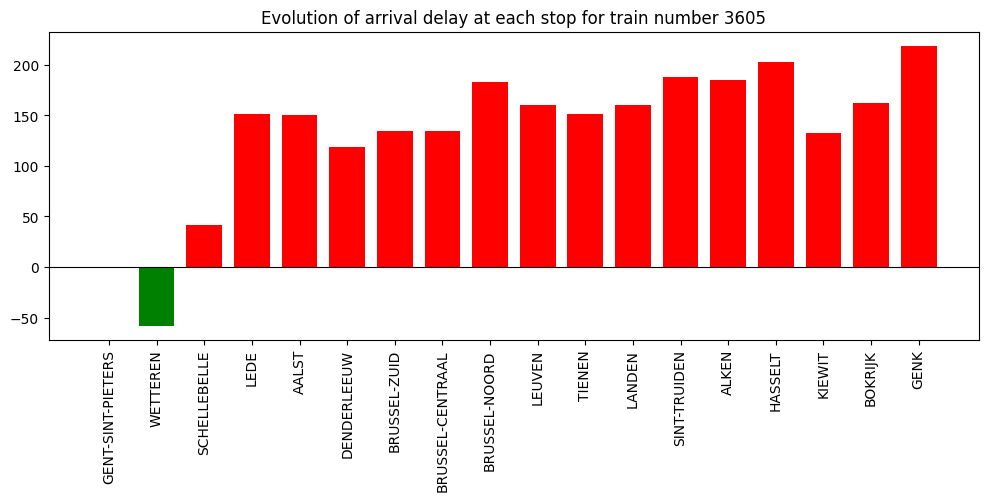

In [84]:
# Collect arrival delay data from dataframe and convert to list
labels = train_3605['Stopping place'].to_list()
arrival_delays = train_3605['Delay at arrival'].fillna(0).to_list()
x = range(len(labels))

# Width for grouped bars
width = 0.75

fig, ax = plt.subplots(figsize=(12,4))

# Define colors: green if negative, red if positive
colors = ['green' if v < 0 else 'red' for v in arrival_delays]

# Plot bars and horizontal line at 0
plt.bar(x, arrival_delays, width, color=colors)
plt.axhline(0, color="black", linewidth=0.8) 

# Set title and x labels
plt.title("Evolution of arrival delay at each stop for train number 3605")
plt.xticks(x, labels, rotation=90)
plt.show()

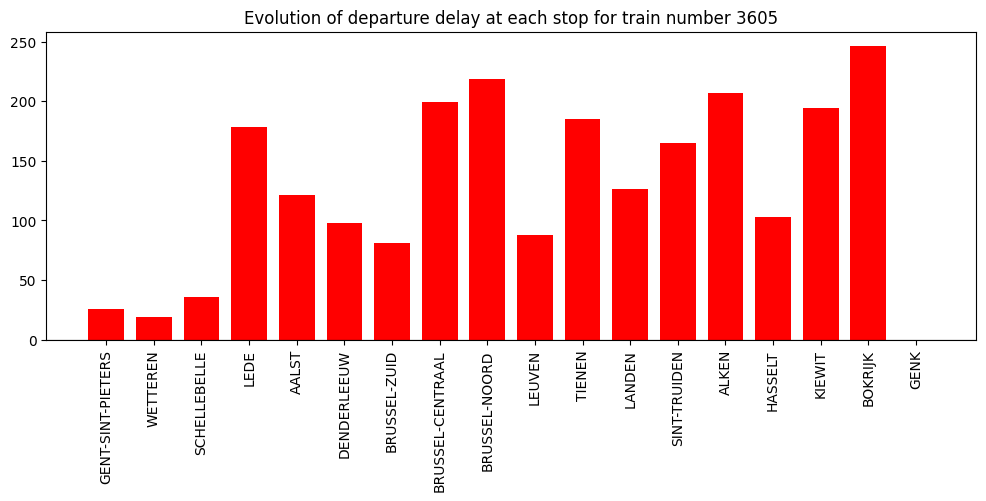

In [85]:
# Collect departure delay data from dataframe and convert to list
labels = train_3605['Stopping place'].to_list()
arrival_delays = train_3605['Delay at departure'].fillna(0).to_list()
x = range(len(labels))

# Width for grouped bars
width = 0.75

fig, ax = plt.subplots(figsize=(12,4))

# Define colors: green if negative, red if positive
colors = ['green' if v < 0 else 'red' for v in arrival_delays]

# Plot bars and horizontal line at 0
plt.bar(x, arrival_delays, width, color=colors)
plt.axhline(0, color="black", linewidth=0.8) 

# Set title and x labels
plt.title("Evolution of departure delay at each stop for train number 3605")
plt.xticks(x, labels, rotation=90)
plt.show()

## 3. Stations & Stops

In [112]:
# Import stations dataset
stations_df = pd.read_csv("./Data/stations.csv")
stations_df.head()

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,8101003,Wien Hbf,NaN,NaN,NaN,NaN,at,16.375864,48.184923,0.000000,0.0
1,8734201,Arras,NaN,NaN,NaN,NaN,fr,2.781690,50.286830,0.014925,120.0
2,8015345,Aachen Hbf,Aix-la-Chapelle Hbf,Aken Hbf,NaN,NaN,de,6.105275,50.770832,30.268657,300.0
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0


In [113]:
# Import stops dataset
stops_df = pd.read_csv("./Data/stops.csv").drop_duplicates('URI')
stops_df.head()

,URI,parent_stop,longitude,latitude,name,alternative-nl,alternative-fr,alternative-de,alternative-en,platform
0,http://irail.be/stations/NMBS/008821022#3,http://irail.be/stations/NMBS/008821022,4.436395,51.20736,Antwerpen-Oost platform 3,Antwerpen-Oost perron 3,Anvers-Est voie 3,Antwerpen-Oost gleiss 3,Antwerp-East platform 3,3
1,http://irail.be/stations/NMBS/008821022#4,http://irail.be/stations/NMBS/008821022,4.436395,51.20736,Antwerpen-Oost platform 4,Antwerpen-Oost perron 4,Anvers-Est voie 4,Antwerpen-Oost gleiss 4,Antwerp-East platform 4,4
2,http://irail.be/stations/NMBS/008891140#1,http://irail.be/stations/NMBS/008891140,3.447848,51.09230,Aalter platform 1,Aalter perron 1,Aalter voie 1,Aalter gleiss 1,Aalter platform 1,1
3,http://irail.be/stations/NMBS/008891140#2,http://irail.be/stations/NMBS/008891140,3.447848,51.09230,Aalter platform 2,Aalter perron 2,Aalter voie 2,Aalter gleiss 2,Aalter platform 2,2
4,http://irail.be/stations/NMBS/008891140#3,http://irail.be/stations/NMBS/008891140,3.447848,51.09230,Aalter platform 3,Aalter perron 3,Aalter voie 3,Aalter gleiss 3,Aalter platform 3,3


In the stations dataset you can find the `station_id` identifier. This is a **unique code** for each train station and is used to link different datasets together as shown in the ERD at the beginning of this notebook. However, this is not yet readily available in the stops dataset. It can be retreived from the `URI` (Uniform Resource Identifier) or `parent_stop` column. As you can see a station can have multiple platforms, let's investigate this in more detail:

In [114]:
def extract_station_id_from_parent_stop(text):
    return text.split('/')[-1]

# Apply function on each row
stops_df['station_id'] = stops_df['parent_stop'].apply(lambda x: extract_station_id_from_parent_stop(x)) 

In [115]:
def extract_station_id_from_URI(text):
    return text.split('/')[-1].split('#')[0]

# Apply function on each row
stops_df['station_id2'] = stops_df['URI'].apply(lambda x: extract_station_id_from_URI(x)) 

In [116]:
# Show result
stops_df[['station_id', 'station_id2', 'URI', 'parent_stop', ]].head()

,station_id,station_id2,URI,parent_stop
0,008821022,008821022,http://irail.be/stations/NMBS/008821022#3,http://irail.be/stations/NMBS/008821022
1,008821022,008821022,http://irail.be/stations/NMBS/008821022#4,http://irail.be/stations/NMBS/008821022
2,008891140,008891140,http://irail.be/stations/NMBS/008891140#1,http://irail.be/stations/NMBS/008891140
3,008891140,008891140,http://irail.be/stations/NMBS/008891140#2,http://irail.be/stations/NMBS/008891140
4,008891140,008891140,http://irail.be/stations/NMBS/008891140#3,http://irail.be/stations/NMBS/008891140


We can now use this unique station identifier (`station_id`) to get station specific information. For example, we can check **how many platforms** are provided at each train station:

In [117]:
# Count the number platforms for each station
platform_count_df = stops_df.groupby('station_id').size().reset_index()

# Rename columns
platform_count_df.columns = ['station_id', 'platforms']

# Order based on count
platform_count_df = platform_count_df.sort_values('platforms', ascending=False)

# Show
platform_count_df

,station_id,platforms
62,008814001,21
90,008821006,14
177,008833001,13
1,008811007,13
125,008822004,12
...,...,...
145,008822772,1
361,008873239,1
448,008891553,1
147,008822848,1


In [118]:
# Convert station_id from string type to integer type
platform_count_df['station_id'] = platform_count_df['station_id'].astype(int)

In [119]:
# Merge result with stations_df's station_id to retrieve the names of the station
platform_count_df = platform_count_df.merge(stations_df[['station_id', 'name']], how='left', on='station_id')
platform_count_df

,station_id,platforms,name
0,8814001,21,Brussel-Zuid/Bruxelles-Midi
1,8821006,14,Antwerpen-Centraal
2,8833001,13,Leuven
3,8811007,13,Schaarbeek/Schaerbeek
4,8822004,12,Mechelen
...,...,...,...
551,8822772,1,Bornem
552,8873239,1,Yves-Gomezée
553,8891553,1,Zeebrugge-Dorp
554,8822848,1,Ruisbroek-Sauvegarde


In [120]:
# Check for missing values
platform_count_df.isnull().sum()

station_id    0
platforms     0
name          0
dtype: int64

Nice! We have the number of platforms for each train station in our dataset. Thank to the inclusion of the station name we can also **verify** this information via external data (e.g., wikipedia).

## 4. Travelers

In [95]:
# Import travelers dataset
travelers_df = pd.read_csv("./Data/travelers.csv", sep=";", index_col=0)
travelers_df.head()

,Station,Avg number of travelers in the week,Avg number of travelers on Saturday,Avg number of travelers on Sunday
0,AALST,6444.0,1768.0,1592.0
1,AALST-KERREBROEK,27.0,NaN,NaN
2,AALTER,2288.0,1055.0,855.0
3,AARSCHOT,6270.0,1954.0,1395.0
4,AARSELE,34.0,NaN,NaN


In [96]:
# Let's rename for convenience later
travelers_df = travelers_df.rename({"Avg number of travelers in the week": "week",
                                    "Avg number of travelers on Saturday": "saturday",
                                    "Avg number of travelers on Sunday": "sunday"}, axis=1)

In [97]:
# Check number of missing values per variable
for col in travelers_df.columns:
    missings = len(travelers_df[col][travelers_df[col].isnull()]) / float(len(travelers_df))
    print(col, missings)

Station 0.0
week 0.003616636528028933
saturday 0.11392405063291139
sunday 0.11211573236889692


In [98]:
# Change settings to visualize ALL rows
pd.set_option('display.max_rows', None)
print(travelers_df[travelers_df.isnull().any(axis=1)])

# Change settings back
pd.reset_option('display.max_rows')

                    Station   week  saturday  sunday
1          AALST-KERREBROEK   27.0       NaN     NaN
4                   AARSELE   34.0       NaN     NaN
20                  ANZEGEM  188.0       NaN     NaN
22                  ARCADES   86.0       NaN     NaN
29                  AUBANGE   62.0       NaN     NaN
33            BAASRODE-ZUID  216.0       NaN     NaN
35             BALEGEM-ZUID  222.0       NaN     NaN
37                BAMBRUGGE   50.0       NaN     NaN
43                  BEERSEL  197.0       NaN     NaN
46                  BEIGNEE   20.0       NaN     NaN
65                   BLERET   51.0       NaN     NaN
84          BRU.-CHAP./KAP.  107.0       NaN     NaN
85               BRU.-CONG.  465.0       NaN     NaN
95                     BUDA   65.0       NaN     NaN
99               CALLENELLE   12.0       NaN     NaN
104           CHAPELLE-DIEU   47.0       NaN     NaN
117                COUILLET   88.0       NaN     NaN
128                   DELTA  396.0       NaN  

Interestingly, we never witness a row where all values are completely missing. Further inspection on Wikipedia and the NMBS website reveal that there are no train rides on these dates for these stations. For example, *Baasrode-Zuid* & *Buda* only have train rides during the week and none in the weekend. Therefore, we will **impute every missing value with zero**.

In [99]:
# Impute missing values with zero
travelers_df['week'].fillna(0)
travelers_df['saturday'].fillna(0)
travelers_df['sunday'].fillna(0)

# Show
travelers_df.head()

,Station,week,saturday,sunday
0,AALST,6444.0,1768.0,1592.0
1,AALST-KERREBROEK,27.0,NaN,NaN
2,AALTER,2288.0,1055.0,855.0
3,AARSCHOT,6270.0,1954.0,1395.0
4,AARSELE,34.0,NaN,NaN


In [100]:
# Create total travelers over the week
travelers_df["week_total"] = 5 * travelers_df["week"] + travelers_df["saturday"] + travelers_df["sunday"]

In [101]:
# Get weekend avg
travelers_df["weekend"] = (travelers_df["sunday"] + travelers_df["saturday"]) / float(2)

In [102]:
# Get avg travelers per day (including weekends)
travelers_df["avg_day"] = travelers_df["week_total"] / float(7)

In [103]:
# Check top 10 stations with highest number of travelers during the weekend
travelers_df.sort_values(by="week", ascending=False)[["Station", "week"]].head(10)

,Station,week
88,BRU.-NOORD/NORD,63779.0
83,BRU.-CENT.,60706.0
87,BRU.-MIDI/ZUID,59670.0
197,GENT-SINT-PIETERS,55325.0
16,ANTWERPEN-CAAL,39628.0
306,LEUVEN,34688.0
403,OTTIGNIES,23508.0
380,NAMUR,21768.0
348,MECHELEN,21616.0
93,BRUGGE,18091.0


In [104]:
# Check top 10 stations with highest number of travelers during the week
travelers_df.sort_values(by="weekend", ascending=False)[["Station", "weekend"]].head(10)

,Station,weekend
87,BRU.-MIDI/ZUID,24133.5
88,BRU.-NOORD/NORD,23720.5
197,GENT-SINT-PIETERS,22951.0
83,BRU.-CENT.,22681.5
16,ANTWERPEN-CAAL,21235.5
306,LEUVEN,12525.5
93,BRUGGE,12493.0
313,LIEGE-GUILLEMINS,12170.0
348,MECHELEN,10026.0
403,OTTIGNIES,8813.0


Most remarkable differences are between Brussels Midi and Brussels North. **Brussels North** is in the middle of the business center, attracting many commuters during the week, while **Brussels Midi** is the most important international railway station of Belgium and thus attracts many tourists (mainly during the weekend). 

Also notice how **Antwerpen** and **Leuven** almost have equal travelers during the week and are **off by almost a factor of two** during the weekend. This could signify a more or less equal commute potential but a far greater touristic potential for Antwerp. However, both are educated guesses based on my personal knowledge about the country. Implementing this mathematically and on a larger scale requires **external data**!

Other explanations for the commute numbers may possible lay in the number of facilities provided by each station. As a proof of concept, we'll try to mathematically proof whether weekly commute numbers are linked to availabilty of free parking and/or tram stations **next week**.

## 5. Facilities

In [105]:
# Import facilities
facilities = pd.read_csv("./Data/facilities.csv")

# Show
facilities.head()

,station_id,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,8734201,Arras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015345,Aachen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8895000,Aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,06:00,20:00,06:00,20:00
3,8895125,Aalst-Kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8891140,Aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,07:00,14:15,07:00,14:15,07:00,14:15,07:45,15:00,07:45,15:00


In [106]:
# Check number of missing values per variable
for col in facilities.columns:
    missings = len(facilities[col][facilities[col].isnull()]) / float(len(facilities))
    print(col, missings)

station_id 0.0
name 0.0
street 0.17210682492581603
zip 0.17359050445103857
city 0.17359050445103857
ticket_vending_machine 0.16765578635014836
luggage_lockers 0.16765578635014836
free_parking 0.16765578635014836
taxi 0.16765578635014836
bicycle_spots 0.16765578635014836
blue-bike 0.16765578635014836
bus 0.16765578635014836
tram 0.16765578635014836
metro 0.16765578635014836
wheelchair_available 0.16765578635014836
ramp 0.16765578635014836
disabled_parking_spots 0.16765578635014836
elevated_platform 0.16765578635014836
escalator_up 0.16765578635014836
escalator_down 0.16765578635014836
elevator_platform 0.16765578635014836
audio_induction_loop 0.16765578635014836
sales_open_monday 0.7997032640949555
sales_close_monday 0.7997032640949555
sales_open_tuesday 0.7997032640949555
sales_close_tuesday 0.7997032640949555
sales_open_wednesday 0.7997032640949555
sales_close_wednesday 0.7997032640949555
sales_open_thursday 0.7997032640949555
sales_close_thursday 0.7997032640949555
sales_open_friday 

In [107]:
# Check data type of columns
facilities.dtypes

station_id                  int64
name                       object
street                     object
zip                        object
city                       object
ticket_vending_machine    float64
luggage_lockers           float64
free_parking              float64
taxi                      float64
bicycle_spots             float64
blue-bike                 float64
bus                       float64
tram                      float64
metro                     float64
wheelchair_available      float64
ramp                      float64
disabled_parking_spots    float64
elevated_platform         float64
escalator_up              float64
escalator_down            float64
elevator_platform         float64
audio_induction_loop      float64
sales_open_monday          object
sales_close_monday         object
sales_open_tuesday         object
sales_close_tuesday        object
sales_open_wednesday       object
sales_close_wednesday      object
sales_open_thursday        object
sales_close_th

In [108]:
# Let's have a look at the sales_open_monday column
facilities[['sales_open_monday']]

,sales_open_monday
0,NaN
1,NaN
2,05:45
3,NaN
4,07:00
...,...
669,NaN
670,05:45
671,NaN
672,NaN


In [109]:
# Change column to time object
facilities['sales_open_monday2'] = pd.to_datetime(facilities['sales_open_monday'].astype(str), format='%H:%M') - pd.to_datetime('00:00', format='%H:%M')

In [110]:
# For instance only use subset of 'late openers' (i.e. opened later than 8 AM)
late_openers = facilities[facilities['sales_open_monday2'] > pd.Timedelta(8,'h')]

In [111]:
# Show late openers on Monday
late_openers[['name', 'sales_open_monday']]

,name,sales_open_monday
158,De Panne,11:15
257,Gouvy,15:15


## Group Assignment

Although we haven't covered all the datasets of the assignment in this notebook, it already helps you to get started with the group assignment. Moreover, based on this week's course material you are already able to solve some of required subquestions found on Ufora.